# Electricity vs Gas

## preleminaries

I imported the smarthome dataset with:

`python3 smartthings.py -d 'sqlite:///db/pythondqlite.db'  'data/smartthings/smartthings.*'`

Also the p1e data set is required with:

`python3 p1e.py -r`


## Overview
This report focuses on the electricity vs gas consumption. Main questions we will be adressing: 

* What is the distribution of the energy and gas usage over a day?
* Are there weekly patterns in the energy and gas usage?

First energy and gas will be explored generally to get a feel for the data. Afterwards we will focus more on the exact consumption per interval.

## Part 1: Electricity

### Overview of the data
For start there will be a quick look at the electricity data to get an overal idea of the distribution of total electricity consumption. The dataset examined includes cumulative data from April 2022 to April 2024. In the following plot we examine the total electricity consumption per month. The difference between the 'imported T1' line and the 'imported T2' line is the difference in tariff, with 'imported T1' representing the total energy usage in low-cost hours, and 'imported T2' representing the total energy usage in high-cost hours. Between this time period, there seems to be an overal gradual increase in total energy usage. However, there seems to be a dip around March of 2023. Since this data captures electricity usage from a single-family house, it is probable that the owners have a child in school, therefore, this decrease in March could result from a Spring Break vacation away from the house.

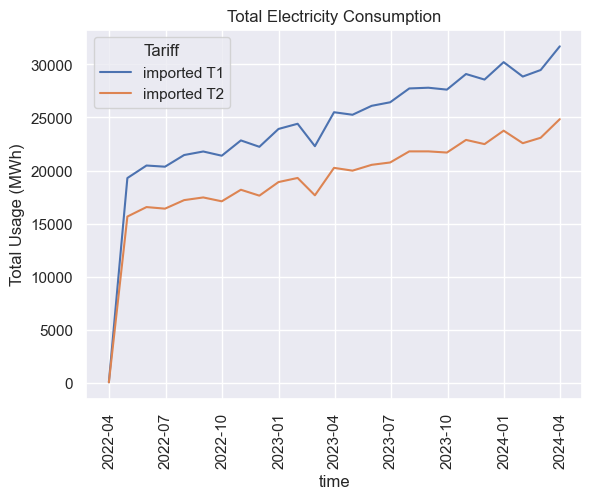

In [1]:
from report_electricity_usage import ReportElcUsage
report = ReportElcUsage()
report.figure1()

### Looking at 2023
The dip in 2023 is interesting. Lets see in the context of one year how different the consumption per month is. The data is plotted in a high tarif bar and a low tarif bar per month, with blue being the energy consumed during low-cost hours, and orange being the energy consumed during high-cost hours. Since each bar is the cumulative energy consumption per month, the time label for each bar represents the last day of each month. 

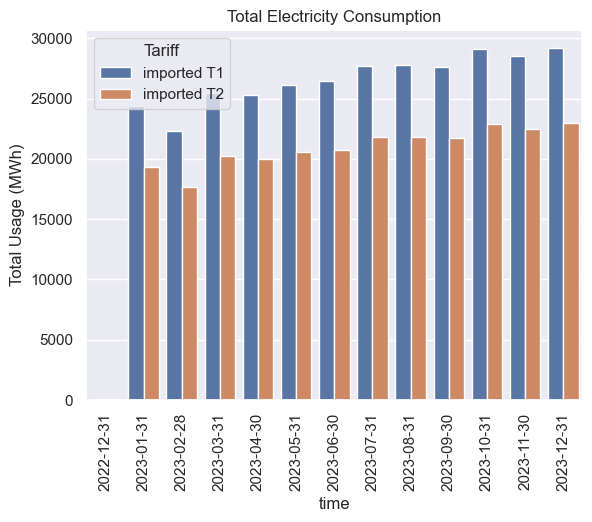

In [2]:
report.figure2()

### Graph Findings
The decrease in energy consumption seems to begin at the end of February, and then slowly starts to rise throughout the month of March. Overall, energy consumption continues to gradually increase after March for tariff levels. 

### Table of March
To furth investigate this decrease in energy consumption in March, lets query data only for the month March and extract each day's energy usage. First we will look at the data for March, then we will compare it to the data for one of the higher electricity usage months, October.

In [2]:
report.march_table()
report.oct_table()

            imported T1  exported T1  imported T2  exported T2
time                                                          
2023-02-28    33941.137          0.0    26911.772          0.0
2023-03-01   814716.477          0.0   646281.464          0.0
2023-03-02   815002.210          0.0   647180.982          0.0
2023-03-03   815229.521          0.0   647881.400          0.0
2023-03-04   815806.806          0.0   648326.304          0.0
2023-03-05   817356.389          0.0   648326.304          0.0
2023-03-06   818138.016          0.0   648593.688          0.0
2023-03-07   818410.883          0.0   649300.405          0.0
2023-03-08   818699.135          0.0   650104.831          0.0
2023-03-09   819043.233          0.0   650957.993          0.0
2023-03-10   819322.748          0.0   651456.655          0.0
2023-03-11   819972.323          0.0   651863.328          0.0
2023-03-12   821460.829          0.0   651863.328          0.0
2023-03-13   822131.062          0.0   652291.059      

### March Table Findings
The data from this table confirms that the energy usage from March starts off low, then generally increases each day. There are a few exception days where the energy usage is significantly lower, like March 26th and March 30, which could represent days when no one was at the house and only the appliances that left on were using electricity. Compared to October, the energy consumption for March is significanlty lower, which could mainly be a result of differences in weather. With colder weather in October, people tend to stay indoors more often, and the the sun begins to set a lot faster, which means heaters and lights would be on more often. To further investigate this difference, lets check the motion levels detected for each month. 

### Total Movement on the Ground Level

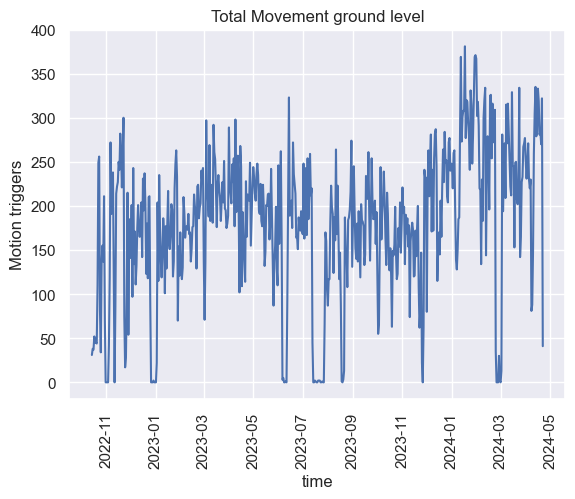

In [2]:
report.motion()                         

### Graph Findings
There are multiple instances where there is zero movement detected in 2023, and these days look to occur in the months of January, June, July, August, and November. With as low of an energy usage level March had in 2023, I would expect there to be days of zero motion triggers, but the number of motion triggers for March actually hovers between 75 and 300 instances. On the other hand, it is not suprising there there were no days in October with zero motion triggers because of the high levels of electricity usage during this month. In fact, the number of alerts during October never drops below 50, which must mean that people were constantly home and moving around during this month. While this graph's findings align with our original assumptions for the month of October, we cannot say the same for the month of March. Hence. lets look at the weather report through these 19 months and compare March to October one last time to determine what the main factor of electricity usage is. 